# Decision Tree

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

In [ ]:
#!pip3 install graphviz

In [4]:
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import graphviz
from sklearn.tree import export_graphviz
from sklearn.model_selection import train_test_split

In [8]:
# PATH 설정: graphviz 경로를 설정.
os.environ["PATH"] += os.pathsep + "/Users/sanghyuk/anaconda/envs/py38/lib/python3.8/site-packages"

![1_2.png](./materials/1_2.png)

## 1) Data

#### -데이터 분석에 사용할 데이터를 Scikit learn으로부터 불러온다  
Breast_cancer Dataset  
Malignant(악성), Benign(양성)  
Dataset info LINK : https://scikit-learn.org/stable/datasets/index.html

#### -위스콘신대 유방암 진단 데이터(WDBC)
- class   : 2
- 샘플수 : 569개
- Feature : 32개 (ID, 진단결과, 30개의 실측값) 
- Samples per class : 212(M labeled '0'), 357(B, labeled '1')

-유방암 데이터로 악성(M), 양성(B) 판단하는 모델 만들기

In [10]:
cancer = load_breast_cancer()
print(cancer.keys())
print(cancer)

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])
{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1,

In [11]:
print(cancer.feature_names)
print(cancer.target_names)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
['malignant' 'benign']


In [12]:
x=pd.DataFrame(cancer.data)
y=pd.Series(cancer.target)
x

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [14]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       569 non-null    float64
 1   1       569 non-null    float64
 2   2       569 non-null    float64
 3   3       569 non-null    float64
 4   4       569 non-null    float64
 5   5       569 non-null    float64
 6   6       569 non-null    float64
 7   7       569 non-null    float64
 8   8       569 non-null    float64
 9   9       569 non-null    float64
 10  10      569 non-null    float64
 11  11      569 non-null    float64
 12  12      569 non-null    float64
 13  13      569 non-null    float64
 14  14      569 non-null    float64
 15  15      569 non-null    float64
 16  16      569 non-null    float64
 17  17      569 non-null    float64
 18  18      569 non-null    float64
 19  19      569 non-null    float64
 20  20      569 non-null    float64
 21  21      569 non-null    float64
 22  22

In [15]:
y

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Length: 569, dtype: int64

In [16]:
#컬럼명 덮어쓰기
x.columns = cancer.feature_names
x

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [17]:

x_train, x_test, y_train, y_test = train_test_split(x.values, y.values, test_size=0.3, random_state=1234)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)


(398, 30)
(398,)
(171, 30)
(171,)


## 2) Model

### hyperparameter

#### (1)Criterion

In [18]:
# model = DecisionTreeClassifier(criterion= 'entropy' , random_state=1234)
model = DecisionTreeClassifier(criterion= 'gini' , random_state=1234)
model.fit(x_train, y_train)

DecisionTreeClassifier(random_state=1234)

In [20]:
print(f'Train Accuracy: {model.score(x_train, y_train)}')
print(f'Test Accuracy: {model.score(x_test, y_test)}')

Train Accuracy: 1.0
Test Accuracy: 0.9298245614035088


In [22]:
model_en = DecisionTreeClassifier(criterion= 'entropy' , random_state=1234)
model_en.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=1234)

In [23]:
print(f'Train Accuracy: {model_en.score(x_train, y_train)}')
print(f'Test Accuracy: {model_en.score(x_test, y_test)}')

Train Accuracy: 1.0
Test Accuracy: 0.9298245614035088


In [31]:
cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

In [24]:
graph_= export_graphviz(model, out_file='tree.dot', class_names= cancer.target_names, 
               feature_names= cancer.feature_names, impurity = True, filled= True) #filled :색구분

# 트리 pdf파일로 저장
with open("tree.dot") as f:
    dot_graph = f.read()

graph = graphviz.Source(dot_graph)


In [30]:
y.head()

0    0
1    0
2    0
3    0
4    0
dtype: int64

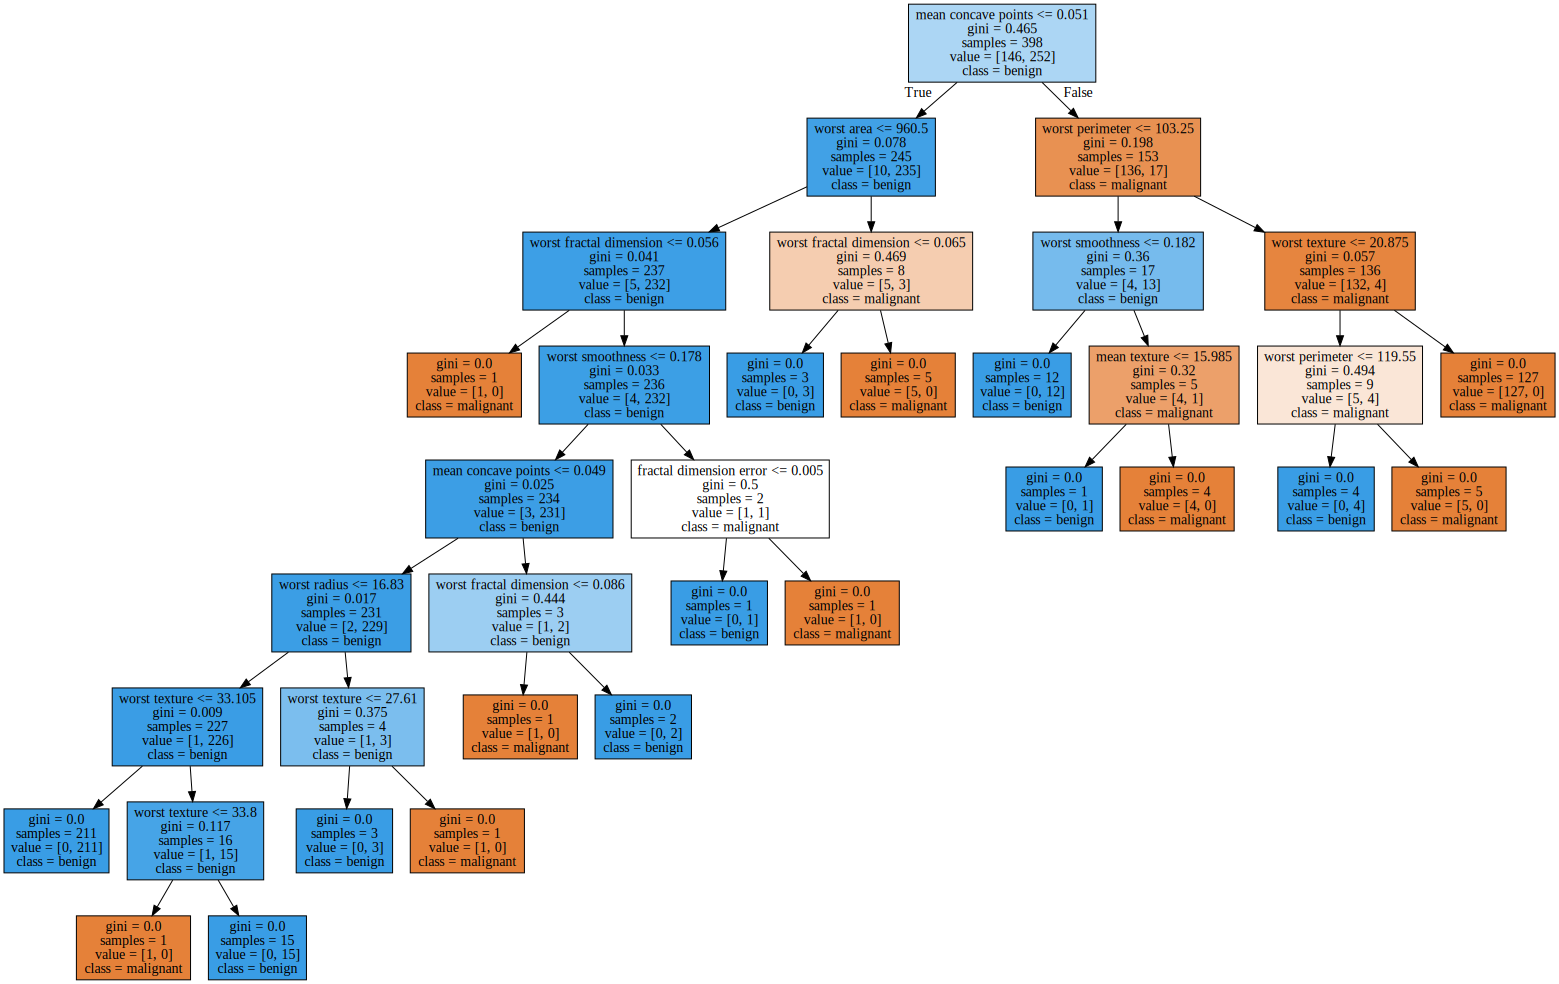

In [25]:
graph

#### (2) max_depth
- root노드를 제외하고 층이 깊이. 
- 현재는 depth = 8

In [32]:
model_depth = DecisionTreeClassifier(max_depth= 4 , random_state=1234)
model_depth.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=1234)

In [38]:
print(f'Train Accuracy: {model_depth.score(x_train, y_train)}')
print(f'Test Accuracy: {model_depth.score(x_test, y_test)}')

Train Accuracy: 0.9899497487437185
Test Accuracy: 0.9415204678362573


In [33]:
graph_= export_graphviz(model_depth, out_file=None, class_names= cancer.target_names, 
               feature_names= cancer.feature_names, impurity = True, filled= True) #filled :색구분

graph = graphviz.Source(graph_)

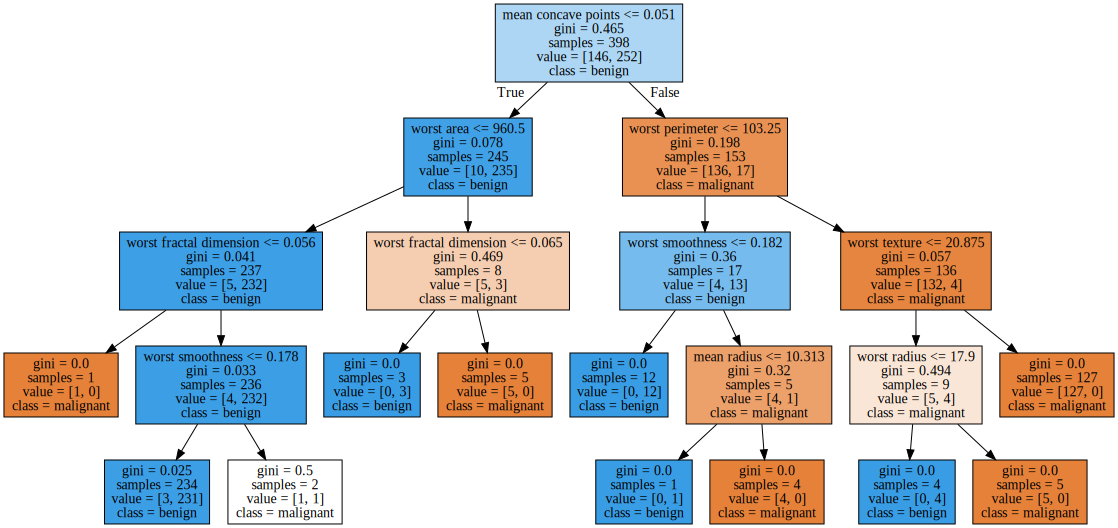

In [34]:
graph

#### (3)min_samples_split
- 최소한의 샘플 수가 있어야 split을 시도. 
- min보다 적으면 거기서 끝낸다. 

In [35]:
model_split = DecisionTreeClassifier(min_samples_split= 5 , random_state=1234)
model_split.fit(x_train, y_train)

DecisionTreeClassifier(min_samples_split=5, random_state=1234)

In [36]:
print(f'Train Accuracy: {model_split.score(x_train, y_train)}')
print(f'Test Accuracy: {model_split.score(x_test, y_test)}')

Train Accuracy: 0.992462311557789
Test Accuracy: 0.9181286549707602


In [37]:
graph_= export_graphviz(model_split, out_file=None, class_names= cancer.target_names, 
               feature_names= cancer.feature_names, impurity = True, filled= True) #filled :색구분

graph = graphviz.Source(graph_)

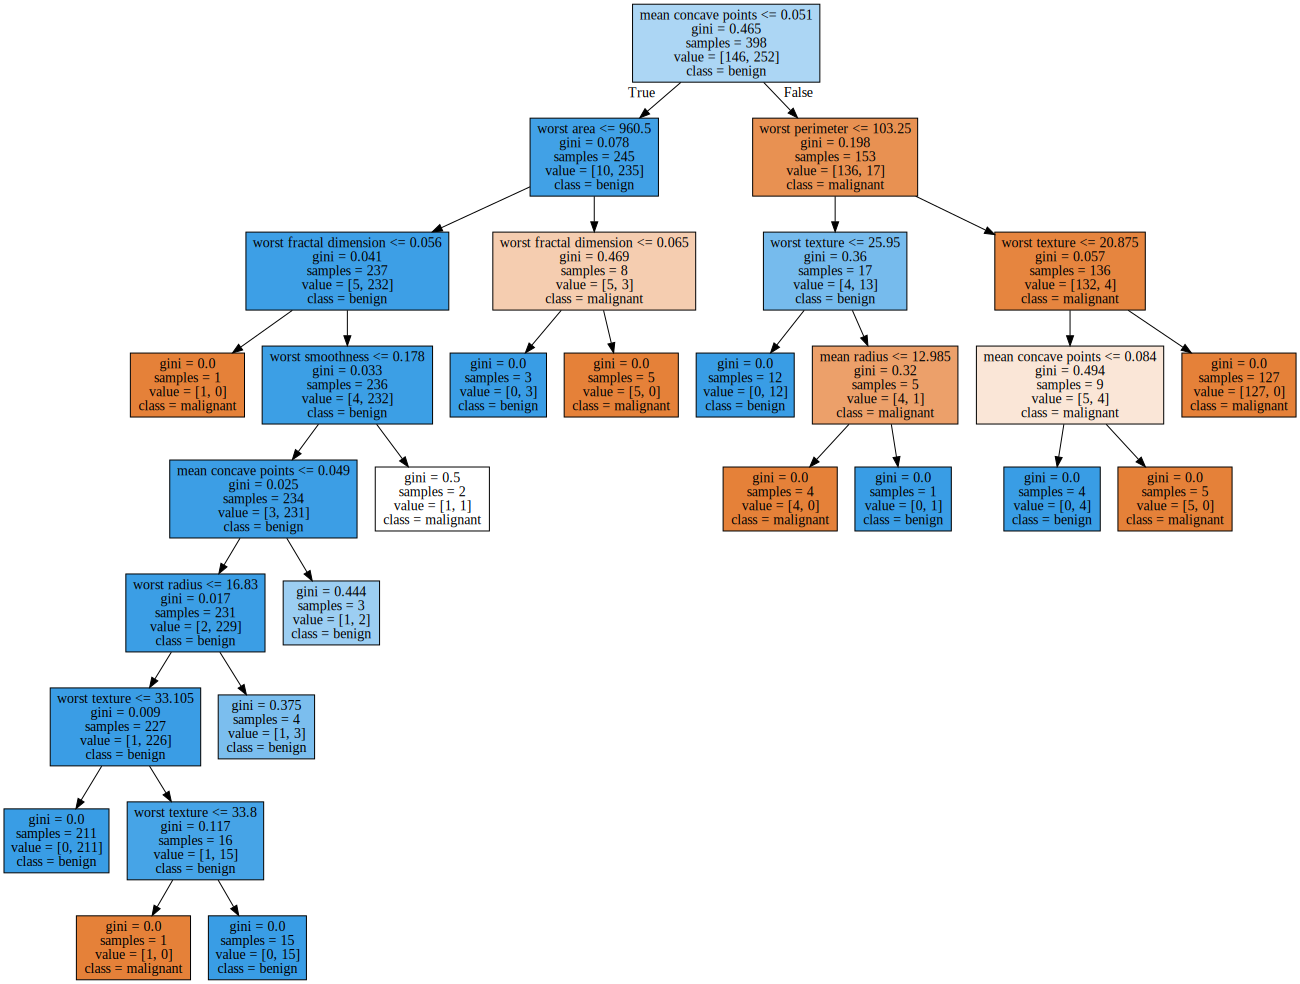

In [38]:
graph

#### (4)min_samples_leaf
- leaf에 최소 n개는 있어야 한다는 것. 

In [41]:
model_leaf = DecisionTreeClassifier(min_samples_leaf= 8 , random_state=1234)
model_leaf.fit(x_train, y_train)

DecisionTreeClassifier(min_samples_leaf=8, random_state=1234)

In [42]:
print(f'Train Accuracy: {model_leaf.score(x_train, y_train)}')
print(f'Test Accuracy: {model_leaf.score(x_test, y_test)}')

Train Accuracy: 0.9597989949748744
Test Accuracy: 0.9181286549707602


In [43]:
graph_= export_graphviz(model_leaf, out_file=None, class_names= cancer.target_names, 
               feature_names= cancer.feature_names, impurity = True, filled= True) #filled :색구분

graph = graphviz.Source(graph_)

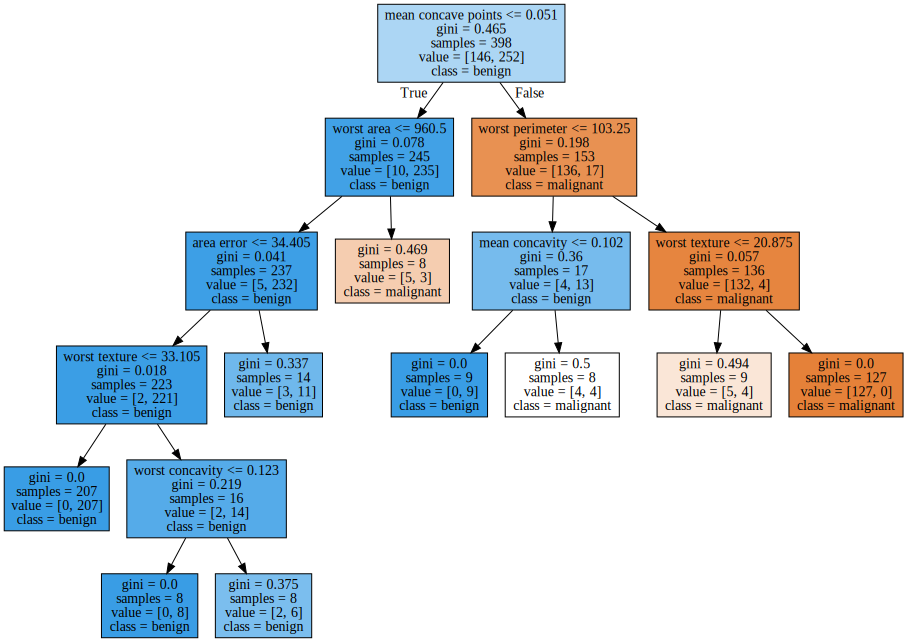

In [44]:
graph

#### (5)min_weight_fraction_leaf (Added in version 0.18)
- split된 다음 각 클래스의 비율이 n보다 작으면 안된다는 제한을 두는 것. 
- 이 비율이 다 0이 될때까지 하니깐, overfitting이 되는 것. 
- 즉, 여기서도 recall이 너무 떨어지는걸 방지하기 위해, sample_weight라는 파라미터가 있어. 이런 파라미터를 안주면, 그냥 싹다 다수로 분류해 버리는게 정확도나 여러가지가 훨씬 좋을 테니깐. 그래서 그 sample_weight를 줬을 때, 마지막 leaf에 최소 이정도는 비율로 존재해야 된다고 오버피팅 방지하는 하이퍼파라미터를 다시 주는 것. 



The minimum weighted fraction of the input samples required to be at a leaf node where weights are determined by sample_weight in the fit() method.

Furthermore, it appears min_weight_fraction_leaf only applies if sample_weight is provided in the call fit(). If sample_weight is not provided in the call to fit(), min_weight_fraction_leaf is silently ignored. Here, I think min_weight_fraction_leaf should still apply under the assumption that all samples are equally weighted OR a warning should be given that min_weight_fraction_leaf will not be used since sample_weight was not provided.

In [49]:
model_leaf = DecisionTreeClassifier(min_weight_fraction_leaf= 0.2 , random_state=1234)
model_leaf.fit(x_train, y_train)

DecisionTreeClassifier(min_weight_fraction_leaf=0.2, random_state=1234)

In [50]:
print(f'Train Accuracy: {model_leaf.score(x_train, y_train)}')
print(f'Test Accuracy: {model_leaf.score(x_test, y_test)}')

Train Accuracy: 0.9321608040201005
Test Accuracy: 0.8771929824561403


In [51]:
graph_= export_graphviz(model_split, out_file=None, class_names= cancer.target_names, 
               feature_names= cancer.feature_names, impurity = True, filled= True) #filled :색구분

graph = graphviz.Source(graph_)

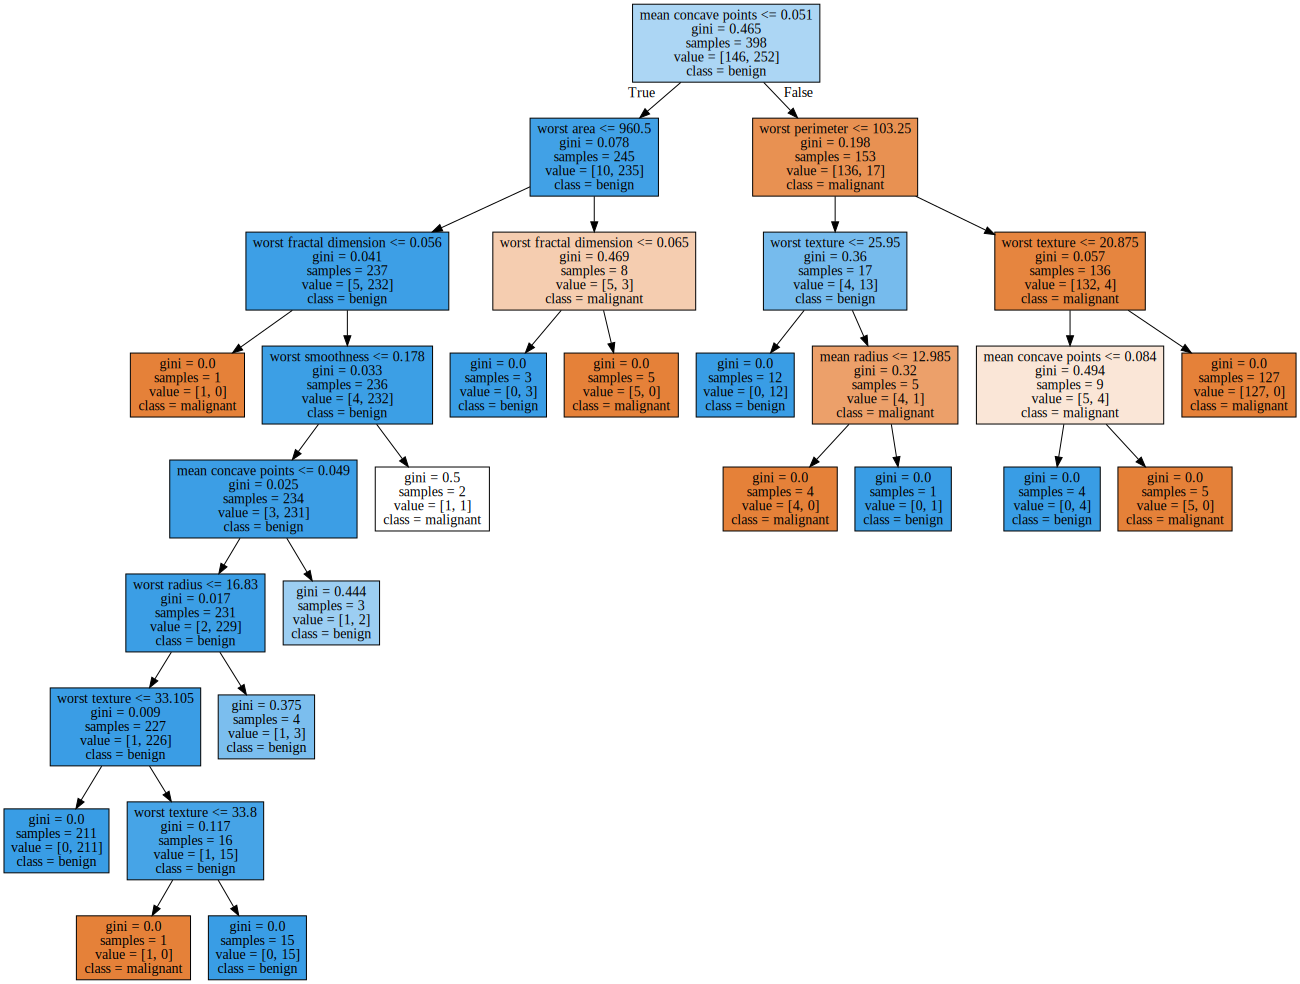

In [52]:
graph

## 3) 성능평가

In [53]:
pred_test = model.predict(x_test)

In [54]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

confusion = confusion_matrix(y_test, pred_test)
acc       = accuracy_score(y_test, pred_test)
prc       = precision_score(y_test, pred_test)
rec       = recall_score(y_test, pred_test)
f1s       = f1_score(y_test, pred_test)

print('<Confusion matrix>')
print(confusion)
print(f'Accuracy:{acc:.2f}, Precision: {prc:.2f}, Recall: {rec:.2f}, F1-score: {f1s:.2f}')

<Confusion matrix>
[[60  6]
 [ 6 99]]
Accuracy:0.93, Precision: 0.94, Recall: 0.94, F1-score: 0.94
